In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

# Parameters and Initialization

In [2]:
# Parameters
N_inp = 2000
N_bar = 2000
num_states = 100

In [71]:
place_inputs = PlaceInputs(N_inp, num_states).get_inputs()
steps=1
model = Model(
    N_inp, N_bar, num_states,
    rec_strength=9.,
    steps=steps,
    )

In [72]:
cache_states = [20, 30, 70]

# Example Narrow/Broad Recall

Now I just cached at location: 20


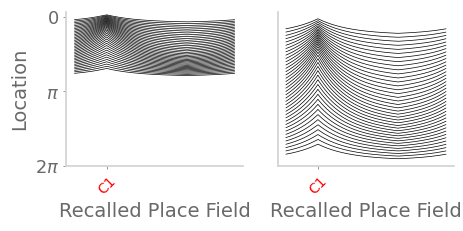

Now I just cached at location: 30


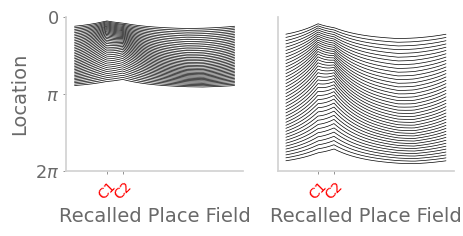

Now I just cached at location: 70


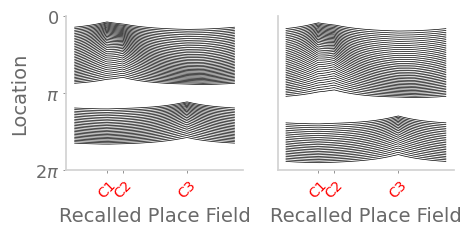

In [73]:
model.reset()

for c_idx, cache_state in enumerate(cache_states):
    
    fig, ax = plt.subplots(1, 2, figsize=(5,2))
    
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs)
    model.update(
        place_inputs[cache_state], acts[cache_state], preacts[cache_state],
        disable_recurrent_update=True)
    
    _, acts, reconstruct, _ = model.run_narrow_recall(place_inputs)
    valid_recall = np.any(reconstruct > reconstruct.mean() + 1.5*reconstruct.std(), axis=1)
    offset = reconstruct.std()/2
    for idx, validity in enumerate(valid_recall):
        if not validity: continue
        r = reconstruct[idx]
        ax[0].plot(np.arange(r.size), r-offset*idx, color='black', linewidth=0.5)
    ax[0].set_yticks([0, -offset*(num_states//2), -offset*(num_states)], [0, '$\pi$', '$2\pi$'])
    
    _, acts, reconstruct, _ = model.run_wide_recall(place_inputs)
    valid_recall = np.any(reconstruct > reconstruct.mean() + 1.5*reconstruct.std(), axis=1)
    offset = reconstruct.std()/2
    for idx, validity in enumerate(valid_recall):
        if not validity: continue
        r = reconstruct[idx]
        ax[1].plot(np.arange(r.size), r-offset*idx, color='black', linewidth=0.5)
    
    ax[0].set_ylabel('Location')
    ax[1].set_ylabel('')
    ax[1].set_yticks([])
    for _ax in ax:
        _ax.set_xlabel('Recalled Place Field')
        xtick_loc = []; xtick_label = [];
        for i, c in enumerate(cache_states[:c_idx+1]):
            xtick_loc.append((c/num_states)*N_bar)
            xtick_label.append(f'C{i+1}')
        _ax.set_xticks(xtick_loc, xtick_label, rotation=45, color='red', fontsize=10)
    plt.show()

# Example cache-or-no-cache

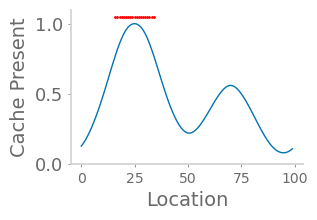

In [74]:
# How to just check if the current location has a seed?
_, acts, _, a_over_time, _ = model.test_run(0., place_inputs)
readout = model.binary_readout(acts).squeeze()
readout /= readout.max()
plt.figure(figsize=(3,2))
plt.xticks([0,20,30,50,70,100], fontsize=10)
plt.plot(readout)
threshold=0.75
idxs = readout > threshold
y = readout[idxs]
y[y>0] = 1.05
plt.scatter(np.arange(100)[idxs], y, s=1, color='red')
plt.xticks([0, 25, 50, 75, 100])
plt.yticks([0, 0.50, 1.0])
plt.ylabel('Cache Present')
plt.xlabel('Location')
plt.show()

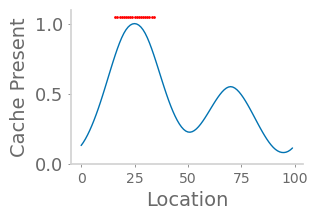

In [75]:
# How to just check if the current location has a seed?
_, acts, _, a_over_time, _ = model.test_run(0.2, place_inputs)
readout = model.binary_readout(acts).squeeze()
readout /= readout.max()
plt.figure(figsize=(3,2))
plt.xticks([0,20,30,50,70,100], fontsize=10)
plt.plot(readout)
threshold=0.75
idxs = readout > threshold
y = readout[idxs]
y[y>0] = 1.05
plt.scatter(np.arange(100)[idxs], y, s=1, color='red')
plt.xticks([0, 25, 50, 75, 100])
plt.yticks([0, 0.50, 1.0])
plt.ylabel('Cache Present')
plt.xlabel('Location')
plt.show()

<Figure size 640x480 with 0 Axes>

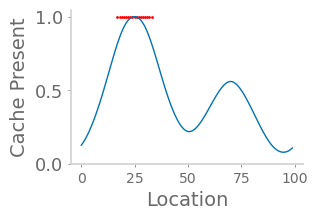

In [76]:
# How to just check if the current location has a seed?
plt.figure()
_, acts, _, a_over_time, _ = model.test_run(0., place_inputs)
readouts = np.zeros(100)
for t in range(steps):
    readout = model.binary_readout(a_over_time[t])
    readouts += readout.squeeze()/readout.max()
readouts = readouts/steps
plt.figure(figsize=(3,2))
plt.xticks([0,20,30,50,70,100], fontsize=10)
plt.plot(readouts)
threshold=0.8
idxs = readouts > threshold
y = readouts[idxs]
y[y>0] = 1
plt.scatter(np.arange(100)[idxs], y, s=1, color='red')
plt.xticks([0,25,50,75,100])
plt.yticks([0, 0.50, 1.0])
plt.ylabel('Cache Present')
plt.xlabel('Location')
plt.show()

<Figure size 640x480 with 0 Axes>

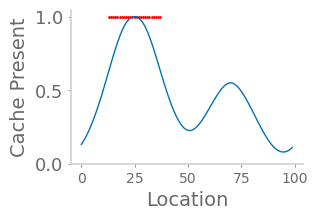

In [77]:
# How to just check if the current location has a seed?
plt.figure()
_, acts, _, a_over_time, _ = model.test_run(0.2, place_inputs)
readouts = np.zeros(100)
for t in range(steps):
    readout = model.binary_readout(a_over_time[t])
    readouts += readout.squeeze()/readout.max()
readouts = readouts/steps
plt.figure(figsize=(3,2))
plt.xticks([0,20,30,50,70,100], fontsize=10)
plt.plot(readouts)
threshold=0.6
idxs = readouts > threshold
y = readouts[idxs]
y[y>0] = 1
plt.scatter(np.arange(100)[idxs], y, s=1, color='red')
plt.xticks([0,25,50,75,100])
plt.yticks([0, 0.50, 1.0])
plt.ylabel('Cache Present')
plt.xlabel('Location')
plt.show()

<Figure size 640x480 with 0 Axes>

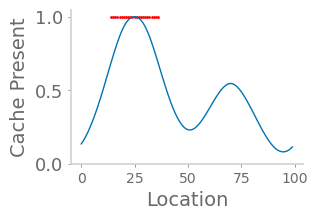

In [78]:
# How to just check if the current location has a seed?
plt.figure()
_, acts, _, a_over_time, _ = model.test_run(0.3, place_inputs)
readouts = np.zeros(100)
for t in range(steps):
    readout = model.binary_readout(a_over_time[t])
    readouts += readout.squeeze()/readout.max()
readouts = readouts/steps
plt.figure(figsize=(3,2))
plt.xticks([0,20,30,50,70,100], fontsize=10)
plt.plot(readouts)
threshold=0.65
idxs = readouts > threshold
y = readouts[idxs]
y[y>0] = 1
plt.scatter(np.arange(100)[idxs], y, s=1, color='red')
plt.xticks([0,25,50,75,100])
plt.yticks([0, 0.50, 1.0])
plt.ylabel('Cache Present')
plt.xlabel('Location')
plt.show()

<Figure size 640x480 with 0 Axes>

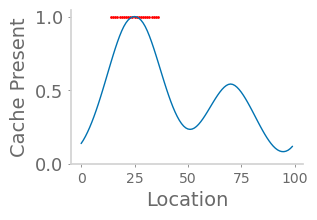

In [79]:
# How to just check if the current location has a seed?
plt.figure()
_, acts, _, a_over_time, _ = model.test_run(0.4, place_inputs)
readouts = np.zeros(100)
for t in range(steps):
    readout = model.binary_readout(a_over_time[t])
    readouts += readout.squeeze()/readout.max()
readouts = readouts/steps
plt.figure(figsize=(3,2))
plt.xticks([0,20,30,50,70,100], fontsize=10)
plt.plot(readouts)
threshold=0.65
idxs = readouts > threshold
y = readouts[idxs]
y[y>0] = 1
plt.scatter(np.arange(100)[idxs], y, s=1, color='red')
plt.xticks([0,25,50,75,100])
plt.yticks([0, 0.50, 1.0])
plt.ylabel('Cache Present')
plt.xlabel('Location')
plt.show()